In [1]:
import numpy as np
import random
import math

## MATRIX FORMATION

In [6]:
class NQueensProblem:

    def __init__(self, init_pop_size = 10, no_of_queens = 8, num_epochs = 50, mutation_rate = 0.5):
        self.init_pop_size = init_pop_size
        self.no_of_queens = no_of_queens
        self.population = self.generate_population()
        self.num_epochs = num_epochs
        self.mutation_rate = mutation_rate
        self.best_metric = math.factorial(no_of_queens)/ (2 * math.factorial(no_of_queens - 2))
        #self.fitness = self.calculate_fitness()

    def generate_individual(self):
        individual = np.zeros((self.no_of_queens, self.no_of_queens), dtype=int)
        
        for i in range(no_of_queens):
            row = random.randint(0, self.no_of_queens -1)
            col = random.randint(0, self.no_of_queens -1)
            individual[row, col] = 1

        return individual

    def generate_population(self): # generating the first random settings of the queens
        population = []
        for _ in range(initial_pop_size):
            population.append(self.generate_individual())
        return population

    def mutate_children(self, c):
        n = len(c)  
        for i in range(n):
            if np.random.uniform(0, 1) < self.mutation_rate:
                # Find the current column with the 1
                current_col = np.where(c[i] == 1)
                #print(current_col)
                
                # Choose a new column that is different from the current one
                new_col = current_col
                while new_col == current_col:
                    new_col = np.random.randint(0, n)

                # Move the '1' to the new column
                c[i][current_col] = 0
                c[i][new_col] = 1
        return c


    def fitness_function(self, individual):
        fitness_score = 0 
        num_rows = individual.shape[0]
        num_cols = individual.shape[1]
        queen_positions = []
        for i in range(num_rows):
            for j in range(num_cols):
                if individual[i][j] == 1:
                    queen_positions.append((i,j))                    
        fitness_score = self.calc_total_non_conflicting_pairs(queen_positions)/self.best_metric
        print("Fitness score: " + str(fitness_score))
        return fitness_score

                    
    def calc_total_non_conflicting_pairs(self, array):
        n = len(array)
        total_pairs = n * (n - 1) // 2  # Total number of unique pairs
        conflicting_pairs = 0
        for i in range(n):
            for j in range(i + 1, n):
                row1, col1 = array[i]
                row2, col2 = array[j]
                
                # Count conflicts
                if row1 == row2 or col1 == col2 or abs(row1 - row2) == abs(col1 - col2):
                    conflicting_pairs += 1

        non_conflicting_pairs = total_pairs - conflicting_pairs
        return non_conflicting_pairs

    # N point Crossover
    def n_crossover(self, p1, p2, n):

        split_positions = sorted(np.random.choice(range(self.no_of_queens), n, replace=False))
        c1 = []
        c2 = []
        print("P1: " + str(p1))
        print("P2: " + str(p2))
        subarrays_p1 = np.split(p1, split_positions)
        subarrays_p2 = np.split(p2, split_positions)
        print("subarray P1: " + str(subarrays_p1))
        print("subarray P2: " + str(subarrays_p2))

        for i in range(len(subarrays_p1)):
            if (i % 2 == 0):
                c1.append(subarrays_p1[i])
                c2.append(subarrays_p2[i])
            else: 
                c1.append(subarrays_p2[i])
                c2.append(subarrays_p1[i])

        return c1,c2


    # Uniform Crossover
    def crossover(self, p1, p2):
        crossover_probability = 0.5
        if(np.random.uniform(0,1) < crossover_probability): #checks for overall probability 
            #print("Performing Uniform Crossover")
            for i in range(len(p1)):
                if np.random.uniform(0,1) < 0.5: # genes are swapped with 50% probability
                    t = p1[i]
                    p1[i] = p2[i]
                    p2[i] = t
        return p1, p2

    def run(self):
        best_fitness_per_epoch = []
        print("Running N-Queens Problem: \n")
        for i in range(1):
            fitness_array = []
            
            for i in range(len(self.population)):
                individual = self.population[i]

                fitness = self.fitness_function(individual)
                fitness_array.append(fitness)
                # print(fitness)

            #print(fitness_array)
            sort_index = [i for i, x in sorted(enumerate(fitness_array), key=lambda x: x[1])]

            best = sort_index[0]
            second_best = sort_index[1]
            #print()
            c1, c2 = self.n_crossover(self.population[best], self.population[second_best], 2)
            mutated_c1 = self.mutate_children(c1)
            mutated_c2 = self.mutate_children(c2)
            fitness_score_mc1 = self.fitness_function(mutated_c1)
            fitness_score_mc2 = self.fitness_function(mutated_c2)
            best_fitness_per_epoch.append(fitness_score_mc1)
            
            worst = sort_index[-1]
            second_worst = sort_index[-2]
            self.population[worst] = mutated_c1
            self.population[second_worst] = mutated_c2
            #self.best_fitness_per_epoch = best_fitness_per_epoch
        return best_fitness_per_epoch
    



In [7]:

initial_pop_size = 10
no_of_queens = 8
NQueensProblem = NQueensProblem(initial_pop_size, no_of_queens, num_epochs = 50, mutation_rate = 0.5)
best_fitness_per_epoch= NQueensProblem.run()
#print(best_fitness_per_epoch)
print(len(best_fitness_per_epoch))






Running N-Queens Problem: 

Fitness score: 0.5357142857142857
Fitness score: 0.6785714285714286
Fitness score: 0.6785714285714286
Fitness score: 0.5714285714285714
Fitness score: 0.35714285714285715
Fitness score: 0.75
Fitness score: 0.6785714285714286
Fitness score: 0.75
Fitness score: 0.5
Fitness score: 0.7142857142857143
P1: [[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 1 0 1 1 0 0]
 [0 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]
P2: [[0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 1]
 [0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [1 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]
subarry P1 ; [array([], shape=(0, 8), dtype=int64), array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0]]), array([[0, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])]


UnboundLocalError: cannot access local variable 'subarrays_p2' where it is not associated with a value

In [39]:
p1 = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
p2 = np.array([[0, 0, 0, 1], [0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 1]])



length = p1.shape[0]
crossover_probability = 0.7
n = 2

if(np.random.uniform(0,1) < crossover_probability): #checks for overall probability 
    c1 = []
    c2 = []
    for i in range(len(p1)):
        if (i % n == 0):
            print(f"Appending the {i}th row")
            c1.append(p1[i])
            c2.append(p1[i])
            i += 1 
        else: 
            print(f"Appending the {i}th row")
            c1.append(p2[i])
            c2.append(p1[i])
            i += 1 

        
a1 = np.vstack(c1)
#c2 = np.vstack(c2)


print(a1)

Appending the 0th row
Appending the 1th row
Appending the 2th row
Appending the 3th row
[[1 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 0 1]]


50


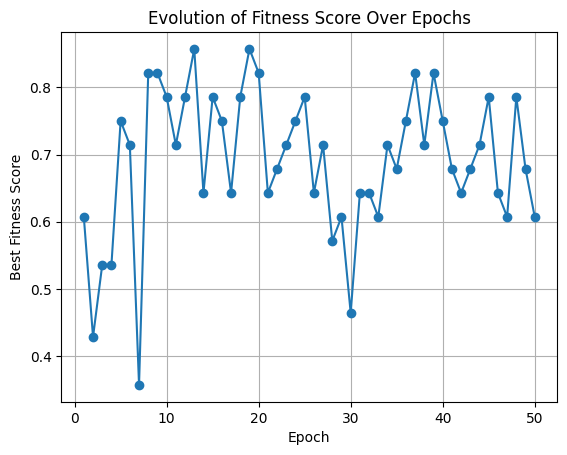

NameError: name 'plot' is not defined

In [23]:
import matplotlib.pyplot as plt
print(len(best_fitness_per_epoch))
#def plot(best_fitness_per_epoch, num_epochs = 50):

# Plot the best fitness score per epoch
num_epochs = 50
plt.plot(range(1, 50 + 1), best_fitness_per_epoch, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Best Fitness Score')
plt.title('Evolution of Fitness Score Over Epochs')
plt.grid()
plt.show()

plot(best_fitness_per_epoch)

The maximum number of non-conflicting pairs is: 28.0
Fitness score: mc1: 12
Fitness score: mc2: 12
Fitness score: mc1: 16
Fitness score: mc2: 16
Fitness score: mc1: 14
Fitness score: mc2: 14
Fitness score: mc1: 24
Fitness score: mc2: 14
Fitness score: mc1: 20
Fitness score: mc2: 20
Fitness score: mc1: 12
Fitness score: mc2: 19
Fitness score: mc1: 14
Fitness score: mc2: 14
Fitness score: mc1: 12
Fitness score: mc2: 12
Fitness score: mc1: 16
Fitness score: mc2: 16
Fitness score: mc1: 18
Fitness score: mc2: 21
Fitness score: mc1: 21
Fitness score: mc2: 21
Fitness score: mc1: 20
Fitness score: mc2: 22
Fitness score: mc1: 19
Fitness score: mc2: 19
Fitness score: mc1: 18
Fitness score: mc2: 18
Fitness score: mc1: 20
Fitness score: mc2: 20
Fitness score: mc1: 21
Fitness score: mc2: 21
Fitness score: mc1: 22
Fitness score: mc2: 22
Fitness score: mc1: 17
Fitness score: mc2: 17
Fitness score: mc1: 18
Fitness score: mc2: 18
Fitness score: mc1: 22
Fitness score: mc2: 22
Fitness score: mc1: 16
Fitn

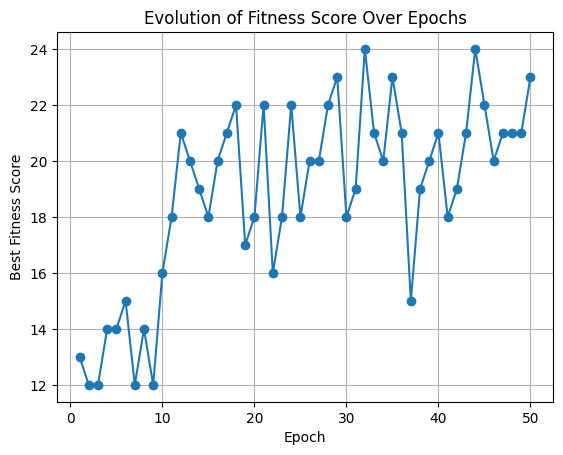

In [18]:
import matplotlib.pyplot as plt
import math 

epochs = 50
num_queens = 8

max_non_conflicting_pairs = math.factorial(num_queens)/(2 * math.factorial(num_queens - 2))
print("The maximum number of non-conflicting pairs is: " + str(max_non_conflicting_pairs))
init_population_size = 10
best_fitness_per_epoch = []
mutation_rate = 0.5

population = generate_population(num_queens, init_population_size)

for i in range(epochs):
    fitness_array = []
    
    for i in range(len(population)):
        individual = population[i]

        fitness = fitness_function(individual)
        fitness_array.append(fitness)
        # print(fitness)

    #print(fitness_array)
    sort_index = [i for i, x in sorted(enumerate(fitness_array), key=lambda x: x[1])]

    best = sort_index[0]
    second_best = sort_index[1]
    c1, c2 = crossover(population[best], population[second_best])
    mutated_c1 = mutate_children(c1, mutation_rate)
    mutated_c2 = mutate_children(c2, mutation_rate)
    fitness_score_mc1 = fitness_function(mutated_c1)
    fitness_score_mc2 = fitness_function(mutated_c2)
    best_fitness_per_epoch.append(fitness_array[best])

    print("Fitness score: mc1: " + str(fitness_score_mc1))
    print("Fitness score: mc2: " + str(fitness_score_mc2))
    #print(fitness_score_mc2)
    worst = sort_index[-1]
    second_worst = sort_index[-2]
    population[worst] = mutated_c1
    population[second_worst] = mutated_c2
    #print(worst)
    #print(second_worst)

# Plot the best fitness score per epoch
plt.plot(range(1, epochs + 1), best_fitness_per_epoch, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Best Fitness Score')
plt.title('Evolution of Fitness Score Over Epochs')
plt.grid()
plt.show()


In [9]:
s = [2, 3, 1, 4, 5]


# Using the built-in sorted() function along with enumerate() function
# enumerate() returns a tuple (index, value) for each element in the list
# and sorted() sorts the list based on the value
sort_index = [i for i, x in sorted(enumerate(s), key=lambda x: x[1])]
print(sort_index)

[2, 0, 1, 3, 4]


In [ ]:
class LABS:

    def __init__(self, init_pop_size = 10, mutation_rate = 0.5):
        self.init_pop_size = init_pop_size
        self.mutation_rate = mutation_rate

    def generate_pairs():

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=39a91287-2189-48c9-99b5-0dfcdbf377a7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>